In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
import matplotlib
import seaborn as sns
def get_colors(num):
    if num <= 10:
        return sns.color_palette(palette='tab10', n_colors=num).as_hex()
    elif num <= 20:
        return sns.color_palette(palette='tab20', n_colors=num).as_hex()
    else:
        return list(matplotlib.colors.cnames.values())[:num]

In [7]:
input_dir = 'G:/dataset/result_pic/index_res/total_plot/'
files = [
    'BRCA.csv',
    'Coronal.csv',
    'DLPFC_slice.csv',
    'LICA_horizon.csv',
    'MOp.csv',
    'MOSTA.csv',
    'MouseAtlas_slice.csv',
    'MouseOB35.csv',
    'mPFC.csv',
    'PDAC.csv',
    'Saggital_horizon.csv',
    'Sagittal_all.csv']
columns = ['BRCA', 'Coronal', 'DLPFC_slice', 'LICA_horizon', 'MOp', 'MOSTA', 'MouseAtlas_slice', 'MouseOB35',
           'mPFC', 'PDAC', 'Saggital_horizon', 'Sagittal_all']

# files = [
#     'BRCA.csv',
#     'Coronal.csv',
#     'DLPFC_slice.csv',
#     'LICA_horizon.csv',
#     'MOp.csv',
#     'MOSTA.csv',
#     'mPFC.csv',
#     'PDAC.csv',]
# columns = ['BRCA', 'Coronal', 'DLPFC_slice', 'LICA_horizon', 'MOp', 'MOSTA', 'mPFC', 'PDAC']

methods = ['seurat', 'harmony', 'liger', 'PRECAST', 'STAGATE', 'STAligner', 'DeepST', 'GraphST', 'SPIRAL', 'SPIRAL_pyg']

c = get_colors(len(methods))
method_color_dict = {}
for i in range(len(c)):
    method_color_dict[methods[i]] = c[i]

method_color_dict

{'seurat': '#1f77b4',
 'harmony': '#ff7f0e',
 'liger': '#2ca02c',
 'PRECAST': '#d62728',
 'STAGATE': '#9467bd',
 'STAligner': '#8c564b',
 'DeepST': '#e377c2',
 'GraphST': '#7f7f7f',
 'SPIRAL': '#bcbd22',
 'SPIRAL_pyg': '#17becf'}

In [8]:
df_list = [pd.read_csv(input_dir+file) for file in files]
df_list

[      method       PCR      iASW         iLISI      kBET  graph_connectivity  \
 0    harmony  0.000000  0.681891  2.220000e-16  0.233417            0.896454   
 1     DeepST  0.959160  0.826115  2.220000e-16  0.166774            0.848035   
 2    STAGATE  0.000000  0.390848  2.220000e-16  0.172000            0.709216   
 3  STAligner  0.779061  0.848282  2.470324e-02  0.224473            0.719922   
 4    PRECAST  0.996893  0.706904  4.440000e-16  0.207065            0.796914   
 5      liger  0.918149  0.855775  6.285786e-01  0.353862            0.707560   
 6     seurat  0.988023  0.868030  5.949511e-01  0.277868            0.849157   
 7     SPIRAL  0.955592  0.846967  6.077710e-01  0.315250            0.862326   
 8    GraphST  0.889741  0.826025  8.923436e-01  0.363217            0.914830   
 
    batch_mean  batch_median      cASW  IsolatedLabelsAsw  ...       NMI  \
 0    0.362352      0.233417  0.393143           0.583680  ...  0.195673   
 1    0.560017      0.826115  0.3436

               BRCA   Coronal  DLPFC_slice  LICA_horizon       MOp     MOSTA  \
method                                                                         
PRECAST    0.566737  0.547209     0.510357      0.724811  0.598956  0.412131   
liger      0.498152  0.528530     0.510783      0.706536  0.580850  0.464194   
seurat     0.558440  0.520481     0.506616      0.593103  0.597431  0.505436   
GraphST    0.576449  0.513045     0.516431      0.699007  0.542465  0.573576   
harmony    0.583680  0.516460     0.507820      0.684656  0.583981  0.493900   
DeepST     0.492473  0.516694     0.513851      0.733911  0.566088  0.531418   
STAligner  0.535683  0.534945     0.541658      0.652475  0.500192  0.491454   
SPIRAL     0.575800  0.541041     0.539175      0.723874  0.518922  0.518820   
STAGATE    0.598877  0.525429     0.534149      0.757413  0.500272  0.494535   

           MouseAtlas_slice  MouseOB35      mPFC      PDAC  Saggital_horizon  \
method                                 

C:\Users\23147\AppData\Local\Temp\ipykernel_11032\3357490731.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'IsolatedLabelsAsw_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df_temp[['method', index]], how='left', on='method')
C:\Users\23147\AppData\Local\Temp\ipykernel_11032\3357490731.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'IsolatedLabelsAsw_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df_temp[['method', index]], how='left', on='method')
C:\Users\23147\AppData\Local\Temp\ipykernel_11032\3357490731.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'IsolatedLabelsAsw_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df_temp[['method', index]], how='left', on='method')
C:\Users\23147\AppData\Local\Temp\ipykernel_11032\3357490731.py:9: FutureWarning: Pas

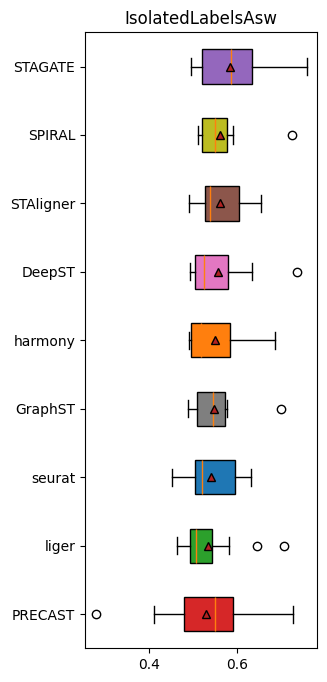

In [9]:
for index in ['PCR', 'iASW', 'iLISI', 'kBET', 'graph_connectivity',
       'cASW', 'IsolatedLabelsAsw', 'cLISI', 'IsolatedLabelsF1', 'ARI', 'NMI',
       'spatial_coherence_score', "Moran's I", "Geary's C"]:
    index = 'IsolatedLabelsAsw'
    
    df = pd.DataFrame()
    df['method'] = ['seurat', 'harmony', 'liger', 'PRECAST', 'STAGATE', 'STAligner', 'DeepST', 'GraphST', 'SPIRAL', 'SPIRAL_pyg']
    for df_temp in df_list:
        df = pd.merge(df, df_temp[['method', index]], how='left', on='method')
    
    

    df.index = df.method
    df = df.drop(columns=['method'])
    df = df.drop(index=['SPIRAL_pyg'])    
#     print(df)
    df.columns = columns
    df = df.dropna(axis=1, how='any')
#     print(df)

    df['avg'] = df.mean(axis=1, numeric_only=True)
    df = df.sort_values(by='avg',ascending=True)
    print(df)
    df = df.drop(columns=['avg'])

    data = df.values.T

    save_path = 'G:/dataset/result_pic/index_res/'
    c_list = [method_color_dict[i] for i in df.index.tolist()]
    y_ticklabels = df.index.tolist()
    title = index

    plt.figure(figsize=(3, 8))
    meanpointprops = dict(markeredgecolor='black', markerfacecolor='firebrick')
    ax = plt.subplot()
    bplot = ax.boxplot(data, vert=False,
                       patch_artist=True, showmeans=True, meanprops= meanpointprops) # 绘图

    # ax.set_xlim([0,1])                                       
    ax.set_yticklabels(y_ticklabels, fontsize=10)   
    ax.set_title(title)                                          # 设置图像标题
    if c_list != None:
        assert len(c_list) == len(y_ticklabels), 'color num is error'
        for patch, color in zip(bplot['boxes'], c_list):
            patch.set_facecolor(color)

    # plt.show()
#     plt.savefig(save_path+index+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    break

In [ ]:
df_list[0].columns

In [ ]:
df_list = [pd.read_csv(input_dir+file) for file in files]
df_list

df['avg'] = df.mean(axis=1, numeric_only=True)
df = df.sort_values(by='avg',ascending=True)
df

In [ ]:
index = "PCR"

df = pd.DataFrame()
df['method'] = ['seurat', 'harmony', 'liger', 'PRECAST', 'STAGATE', 'STAligner', 'DeepST', 'GraphST', 'SPIRAL', 'SPIRAL_pyg']
for df_temp in df_list:
    df = pd.merge(df, df_temp[['method', index]], how='left', on='method')

df.index = df.method
df = df.drop(columns=['method'])
df = df.drop(index=['SPIRAL_pyg'])
df.columns = columns
print(df)

In [ ]:
df['avg'] = df.mean(axis=1, numeric_only=True)
df = df.sort_values(by='avg',ascending=True)
df

In [ ]:
data = df.values.T

save_path = 'G:/dataset/result_pic/index_res/'
c_list = [method_color_dict[i] for i in df.index.tolist()]
y_ticklabels = df.index.tolist()
title = index

plt.figure(figsize=(3, 8))
meanpointprops = dict(markeredgecolor='black', markerfacecolor='firebrick')
ax = plt.subplot()
bplot = ax.boxplot(data, vert=False,
                   patch_artist=True, showmeans=True, meanprops= meanpointprops) # 绘图

# ax.set_xlim([0,1])                                       
ax.set_yticklabels(y_ticklabels, fontsize=10)   
ax.set_title(title)                                          # 设置图像标题
if c_list != None:
    assert len(c_list) == len(y_ticklabels), 'color num is error'
    for patch, color in zip(bplot['boxes'], c_list):
        patch.set_facecolor(color)
        
# plt.show()
plt.savefig(save_path+index+'.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [4]:
input_dir = 'G:/dataset/result_index/'
files = [
    'DLPFC_spatial_index.csv',
    'MouseAtlas_spatial_index.csv',
    'Saggital_index_spatial.csv',
    'mPFC_spatial_index.csv',
    'MOp_index_spatial.csv']
columns = ['DLPFC', 'MouseAtlas', 'Saggital', 'mPFC', 'MOp']

# files = [
#     'BRCA.csv',
#     'Coronal.csv',
#     'DLPFC_slice.csv',
#     'LICA_horizon.csv',
#     'MOp.csv',
#     'MOSTA.csv',
#     'mPFC.csv',
#     'PDAC.csv',]
# columns = ['BRCA', 'Coronal', 'DLPFC_slice', 'LICA_horizon', 'MOp', 'MOSTA', 'mPFC', 'PDAC']

methods = ['STUtility', 'STalign', 'PASTE', 'moscot_affine', 'moscot_warp', 'SPACEL',  'SPIRAL']

c = get_colors(len(methods))
method_color_dict = {}
for i in range(len(c)):
    method_color_dict[methods[i]] = c[i]

method_color_dict

{'STUtility': '#1f77b4',
 'STalign': '#ff7f0e',
 'PASTE': '#2ca02c',
 'moscot_affine': '#d62728',
 'moscot_warp': '#9467bd',
 'SPACEL': '#8c564b',
 'SPIRAL': '#e377c2'}

In [48]:
df = pd.read_csv('G:/dataset/result_pic/total_index_spatial.csv')
df['SCS_align'] = df['SCS_align'].astype(float)
df['SSIM'] = df['SSIM'].astype(float)
df['PCC'] = df['PCC'].astype(float)
df["Moran's I"] = df["Moran's I"].astype(float)
df["Geary's C"] = df["Geary's C"].astype(float)
df_all = df
df_all

,Sample,Method,SCS_align,SSIM,PCC,Moran's I,Geary's C
0,donor1,STUtility,-336.101933,0.741411,0.760193,0.127178,0.126874
1,donor1,moscot_affine,-227.804702,0.631982,0.647374,0.129103,0.129303
2,donor1,moscot_warp,-203.879623,0.714786,0.743943,0.100686,0.101833
3,donor1,STalign,155.678484,0.586204,0.642044,0.129183,0.128981
4,donor1,paste,-249.106717,0.641622,0.657512,0.129437,0.129594
...,...,...,...,...,...,...,...
59,MOp,moscot_affine,22.470000,0.845217,0.868200,0.186880,0.177743
60,MOp,moscot_warp,23.218490,0.446593,0.459517,0.155158,0.153504
61,MOp,PASTE,20.977300,0.782852,0.811702,0.189567,0.180894
62,MOp,SPACEL,35.651590,0.850502,0.873829,0.186880,0.177743


In [41]:
df['SCS_align'].max()

155.6784844

In [59]:
import warnings
warnings.filterwarnings('ignore')
df = df_all[df_all['Sample'] == 'MOp']
df['SCS_align'] = df['SCS_align'].abs()
df['SCS'] = df['SCS_align']/df['SCS_align'].max()

df['mean'] = df[['SCS', 'SSIM', 'PCC', "Moran's I", "Geary's C"]].mean(axis=1, numeric_only=True)
df = df.sort_values(by='mean',ascending=False)
df

,Sample,Method,SCS_align,SSIM,PCC,Moran's I,Geary's C,SCS,mean
62,MOp,SPACEL,35.651590,0.850502,0.873829,0.186880,0.177743,1.000000,0.617791
63,MOp,SPIRAL,24.567559,0.969787,0.976563,0.174002,0.173416,0.689101,0.596574
59,MOp,moscot_affine,22.470000,0.845217,0.868200,0.186880,0.177743,0.630266,0.541661
61,MOp,PASTE,20.977300,0.782852,0.811702,0.189567,0.180894,0.588397,0.510682
60,MOp,moscot_warp,23.218490,0.446593,0.459517,0.155158,0.153504,0.651261,0.373207


In [21]:
samples = df['Sample'].unique()
samples

array(['donor1', 'donor2', 'donor3', 'embryo1', 'embryo2', 'embryo3',
       'anterior', 'posterior', 'mpfc', 'MOp'], dtype=object)

In [22]:
df_list = [df[df['Sample'] == s] for s in samples]
df_list

[   Sample         Method   SCS_align      SSIM       PCC  Moran's I  Geary's C
 0  donor1      STUtility -336.101933  0.741411  0.760193   0.127178   0.126874
 1  donor1  moscot_affine -227.804702  0.631982  0.647374   0.129103   0.129303
 2  donor1    moscot_warp -203.879623  0.714786  0.743943   0.100686   0.101833
 3  donor1        STalign  155.678484  0.586204  0.642044   0.129183   0.128981
 4  donor1          paste -249.106717  0.641622  0.657512   0.129437   0.129594
 5  donor1         SPACEL -560.162861  0.923296  0.939168   0.129104   0.129303
 6  donor1         SPIRAL -298.463079  0.801888  0.823159   0.116355   0.116633,
     Sample         Method   SCS_align      SSIM       PCC  Moran's I  \
 7   donor2      STUtility   95.216239  0.786867  0.798797   0.178320   
 8   donor2  moscot_affine  208.193363  0.802587  0.817205   0.181678   
 9   donor2    moscot_warp   61.498742  0.716475  0.738849   0.153475   
 10  donor2        STalign  213.098491  0.815747  0.834036   0.1813

                 donor1    donor2    donor3   embryo1   embryo2   embryo3  \
Method                                                                      
moscot_warp    0.714786  0.716475  0.843260  0.000000  0.000000 -0.053898   
STalign        0.586204  0.815747  0.850035  0.579892  0.673875  0.142474   
STUtility      0.741411  0.786867  0.099220       NaN       NaN       NaN   
PASTE               NaN       NaN       NaN       NaN       NaN       NaN   
moscot_affine  0.631982  0.802587  0.904810  0.723092  0.850215  0.759142   
SPACEL         0.923296  0.885802  0.923175  0.835511  0.857994  0.847611   
SPIRAL         0.801888  0.908418  0.915161  0.953731  0.965331  0.959034   

               anterior  posterior      mpfc       MOp       avg  
Method                                                            
moscot_warp    0.711552   0.860106  0.815748  0.446593  0.505462  
STalign        0.744423   0.651703  0.775816       NaN  0.646685  
STUtility      0.892508   0.857604    

C:\Users\23147\AppData\Local\Temp\ipykernel_16124\1794805250.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SSIM_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df_temp[['Method', index]], how='left', on='Method')
C:\Users\23147\AppData\Local\Temp\ipykernel_16124\1794805250.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SSIM_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df_temp[['Method', index]], how='left', on='Method')
C:\Users\23147\AppData\Local\Temp\ipykernel_16124\1794805250.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SSIM_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, df_temp[['Method', index]], how='left', on='Method')
C:\Users\23147\AppData\Local\Temp\ipykernel_16124\1794805250.py:6: FutureWarning: Passing 'suffixes' which cause duplicate c

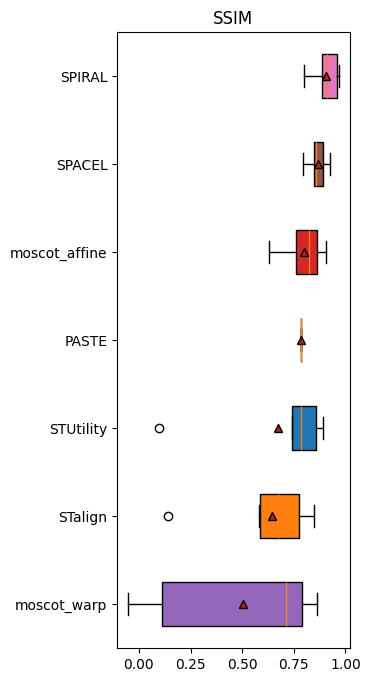

In [34]:
for index in [ 'SSIM', 'PCC']:
    
    df = pd.DataFrame()
    df['Method'] = methods
    for df_temp in df_list:
        df = pd.merge(df, df_temp[['Method', index]], how='left', on='Method')
    
    

    df.index = df.Method
    df = df.drop(columns=['Method'])  
#     print(df)
    df.columns = samples
#     df = df.dropna(axis=1, how='any')
#     print(df)

    df['avg'] = df.mean(axis=1, numeric_only=True, skipna=True)
    df = df.sort_values(by='avg',ascending=True)
    print(df)
    df = df.drop(columns=['avg'])

    data = df.values
    print(data)
    clean_data = []
    for d in data:
        clean_data.append([x for x in d if not np.isnan(x)])

    print(clean_data)
    save_path = 'G:/dataset/result_pic/index_res/'
    c_list = [method_color_dict[i] for i in df.index.tolist()]
    y_ticklabels = df.index.tolist()
    title = index

    plt.figure(figsize=(3, 8))
    meanpointprops = dict(markeredgecolor='black', markerfacecolor='firebrick')
    ax = plt.subplot()
    bplot = ax.boxplot(clean_data, vert=False,
                       patch_artist=True, showmeans=True, meanprops= meanpointprops) # 绘图

    # ax.set_xlim([0,1])
    ax.set_yticklabels(y_ticklabels, fontsize=10)   
    ax.set_title(title)                                          # 设置图像标题
    if c_list != None:
        assert len(c_list) == len(y_ticklabels), 'color num is error'
        for patch, color in zip(bplot['boxes'], c_list):
            patch.set_facecolor(color)

    # plt.show()
#     plt.savefig(save_path+index+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    break